# QF1: Laptop college1b

-------------------------------------------------------------------------------------------------

### Python functies en modules

* **sympy**: symbolische rekenmodule voor python. https://www.sympy.org/en/index.html. De mogelijkheden zijn eindeloos, maar een paar handige functies:
   - integrate(f(x), (x, x0, x1)) integreert een functie f(x) van x0 tot x1. Als grens kan je simpel oneindig aangeven met **oo**
   - simplify(expression) maakt de uitdrukking (meestal) simpeler
* **sympy.physics.quantum**: quantum module binnen sympy https://docs.sympy.org/latest/modules/physics/quantum/index.html. Enkele functies die we gebruik?en tijdens het laptopcollege zijn:
   - Wavefunction(psi(x),x) om een golffunctie te definieren
   - Wavefunction.expr:  geeft de functie psi(x)
   - Wavefunction.conjugate(): geeft de complex geconjugeerde van de golffunctie
   - DifferentialOperator(g(f(x)),f(x)): definieert een quantummechanische operator
   - qapply(operator\*wavefunction): laat een operator los op een golffunctie
*  **ipywidgets**: python module voor het maken van interactieve graphics https://ipywidgets.readthedocs.io/en/latest/.
   - interactive(f(i), i=(i0,i1)): roept functie aan met 'slider bar' die waarden tussen i0 en i1 kan aannemen. Handig om bijvoorbeeld in f(i) een plaatje te maken.
* **matplotlib**: plotting in python die jullie al eerder hebben gebruikt https://matplotlib.org/. Maar nu ook te gebruiken voor het maken van animaties.
   - animation.FuncAnimation(): maak een animatie van bijvoorbeeld een tijdsafhankelijke golffunctie.
   

In [1]:
import sympy
from sympy import *
from sympy.plotting import plot
from sympy import Derivative, Function, Symbol
from sympy.physics.quantum.operator import DifferentialOperator
from sympy.physics.quantum.state import Wavefunction
from sympy.physics.quantum.qapply import qapply
import scipy.integrate as Nintegrate


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

## Opgave3: De Harmonische oscillator

In deze opdracht gaan we de harmonnische oscillator bestuderen, waarbij het doel is om de tijdsafhankelijke oplossingen van de Schrodinger vergeljking te bekijken. We gaan dus eigenfuncties vinden en gegeven begincondities de coefficienten uitrekenen die horen bij de stationaire oplossingen. Met behullp van een python animatie kan je kijken of je het gedrag van de harmonische oscillator kan begrijpen. Je kan zien wanneer de harmonische oscillator zich 'klassiek' gedraagt en wanneer het gedrag meer een 'quantum' signatuur heeft. 

------------------------------------------------------------------

#### Ladderoperatoren en Eigenfuncties

De Schrodinger vergelijking voor de harmonische oscillator (zie Griffiths 2.3) wordt gegeven door:

$$\imath \hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2 m} \frac{\partial^2\Psi(x,t)}{\partial x^2} + \frac{1}{2} m \omega^2 x^2 \Psi(x,t)$$ 

Voor de berekeningen tijdens het laptop college maken we ons leven gemakkelijk. We stellen: $\hbar=m=\omega=1$. De ladderoperatoren worden dan gegeven door:

$$a_{\pm} = \frac{1}{\sqrt{2}} \left( \mp i \hat{p} + \hat{x} \right) =  \frac{1}{\sqrt{2}} \left( \mp \frac{\partial}{\partial x} + x \right) $$

**3a)** Definieer de ladderoperatoren $a_{\pm}$ met behulp van de *DifferentialOperator* en *Derivative* uit sympy.

In [2]:
# ladder operatoren
f= Function('psi')
x= Symbol('x')

a_plus = DifferentialOperator((-  Derivative(f(x),x) + x*f(x))/sympy.sqrt(2),f(x))
a_min  = DifferentialOperator((+  Derivative(f(x),x) + x*f(x))/sympy.sqrt(2),f(x))

**3b)** Definieer ook de Hamiltoniaan. (*Helaas is dat niet eenvoudig in sympy als je ladderoperatoren gebruikt: dus het beste kan je de Hamiltoniaan gebruiken zoals die hierboven in de Schrodinger vergelijking staat*)

In [3]:
# hamiltoniaan
H = DifferentialOperator(-Derivative(f(x),(x,2))/2 + x**2/2 * f(x), f(x))

**3c)** Maak een functie die de n-de harmonische oscillator eigenfunctie teruggeeft. Dit zal dus een recursieve functie zijn waarbij je $a_+$ gebruikt om vanuit de grondtoestand de eigenfuncties met hogere energie te genereren. 

De golffunctie van de grondtoestand wordt gegeven door:

$$\psi_0(x) = \frac{1}{\pi^{1/4}} e^{-x^2/2}$$

In [4]:
def generate_psi(n):
    #
    # genereer the n-de harmonische oscillator eigenfunctie
    #   
    
    #nn = Symbol('nn')
    
    psi=Wavefunction(sympy.exp(-x**2/2) / sympy.pi**(0.25), x)
    for i in range(0,n):
        # laat de a_plus operator werken op de golffunctie
        psi = qapply(a_plus*psi)
        # de factor 1/sqrt(i+1) is nodig om de normalisatie van de golffunctie te behouden
        g = psi.expr / sympy.sqrt(i+1)
        psi = Wavefunction(g,x)
    return psi

**3d)** Genereer de eigenfuncties met $n=5,10,12$ en bereken de energie-eigenwaarden. Kloppen de antwoorden met je verwachting?

In [5]:
# n=5
ww = qapply(H*generate_psi(5))
print("E(n=5) = ",simplify(ww.expr/generate_psi(5).expr))
# n=10
ww = qapply(H*generate_psi(10))
print("E(n=10) = ",simplify(ww.expr/generate_psi(10).expr))
# n=12
ww = qapply(H*generate_psi(12))
print("E(n=12) = ",simplify(ww.expr/generate_psi(12).expr))


E(n=5) =  11/2
E(n=10) =  21/2
E(n=12) =  25/2


**3e)** Maak een functie om de orthonormaliteit van de oplossingen te verifieren: $\int_{-\infty}^{\infty} \psi_m(x)^* \psi_n(x) dx$. En test de functie op een paar paren van eigenfuncties.

In [6]:
#check normalization
def orthonormality(i,j):
    value = integrate(generate_psi(i).expr * generate_psi(j).expr,(x,-oo,+oo))
    return value

In [7]:

print("<1|1> = ",orthonormality(1,1))
print("<1|2> = ",orthonormality(1,2))
print("<2|2> = ",orthonormality(2,1))
print("<2|2> = ",orthonormality(2,2))

<1|1> =  1
<1|2> =  0
<2|2> =  0
<2|2> =  1


**3f)** Maak  een interactieve plot om de eigenfuncties weer te geven van $n=0 ... 50$

In [30]:
xmin = -10
xmax = +10

def wave_plot(m):
    title_string = '$\psi_{' +str(m)+'}(x)$'
    my_plot = plot(generate_psi(m).expr,(x,xmin,xmax), ylim=([-1.,1.]), title=title_string,ytitle='') 
    
interactive_plot = interactive(wave_plot, m=(0, 50))
interactive_plot

interactive(children=(IntSlider(value=25, description='m', max=50), Output()), _dom_classes=('widget-interact'…

-----------------------------------------------------------------------

#### Oplossen van de tijdsafhankelijke Schrodinger vergelijking

Nu we de eigenfuncties $\psi_n(x)$ hebben, kunnen we de tijdsafhankelijke Schrodinger vergelijking oplossen. We gaan hiervoor te werk zoals in het college is besproken. De eerste stap is het definieren van een golffunctie, $\Psi(x,t=0)\equiv \Psi_0(x)$ als beginconditie.

We kiezen er nu voor om een dubbel Gaussische verdeling te definieren met parameters zoals hieronder aangegeven.

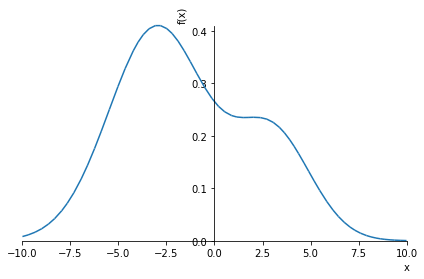

In [9]:
# positie, breedte en hoogte van de 1e Gauss
x0 = -3
sigma0 = 2.5
h0 = 1.0
# positie, breedte en hoogte van de 2e Gauss
x1 = +3
sigma1 = 2.
h1 = 0.5

#
# definieer de golffunctie op t=0
#
Psi0 = Wavefunction(h0*exp(-(x-x0)**2/sigma0**2/2)+h1*exp(-(x+x0)**2/sigma1**2/2),x)
#
# niet vergeten te normaliseren
#
Psi0 = Psi0.normalize()
#
# ... en even te plotten
#
p=plot(Psi0.expr,(x,xmin,xmax))

In [10]:
#
# aantal termen dat we willen hebben in onze oplossing....
#
nterm = 30

coef = []
energy = []
psi_arr = [] 

csum = 0
for i in range(nterm):
    psi_lambda = lambdify(x,generate_psi(i)(x),'scipy')
    psi_arr.append(psi_lambda)
    integrand = generate_psi(i).expr * Psi0.expr 
    integrand_lambda = lambdify(x,integrand,'scipy')
    c = Nintegrate.quad(integrand_lambda, -oo, +oo)[0]
    csum = csum + c*c
    coef.append(c)
    energy.append(i+1/2)
    print(i,' c(',i,')=',c,' E(',i,')=',i+1/2)

print('normalisatie csum = ',csum)

0  c( 0 )= 0.5236923470672812  E( 0 )= 0.5
1  c( 1 )= -0.10597793154390309  E( 1 )= 1.5
2  c( 2 )= 0.4200209404660806  E( 2 )= 2.5
3  c( 3 )= -0.1085575138546888  E( 3 )= 3.5
4  c( 4 )= 0.36864220066321907  E( 4 )= 4.5
5  c( 5 )= -0.10365031930465592  E( 5 )= 5.5
6  c( 6 )= 0.31980661109012193  E( 6 )= 6.5
7  c( 7 )= -0.09665193958850526  E( 7 )= 7.5
8  c( 8 )= 0.2726773685586104  E( 8 )= 8.5
9  c( 9 )= -0.08880008574076609  E( 9 )= 9.5
10  c( 10 )= 0.22901254871341153  E( 10 )= 10.5
11  c( 11 )= -0.08054332179165685  E( 11 )= 11.5
12  c( 12 )= 0.18999855753436404  E( 12 )= 12.5
13  c( 13 )= -0.07216257342353612  E( 13 )= 13.5
14  c( 14 )= 0.15609056031223875  E( 14 )= 14.5
15  c( 15 )= -0.06389455899087457  E( 15 )= 15.5
16  c( 16 )= 0.1272275236164806  E( 16 )= 16.5
17  c( 17 )= -0.055942860420498  E( 17 )= 17.5
18  c( 18 )= 0.10304525884765288  E( 18 )= 18.5
19  c( 19 )= -0.048469215625144856  E( 19 )= 19.5
20  c( 20 )= 0.08303117192370382  E( 20 )= 20.5
21  c( 21 )= -0.041587846589

In [11]:
time = 0
def psi_anim(xx,t):
    value  = 0
    for i in range(nterm):
        value = value + coef[i]*psi_arr[i](xx)*np.exp(-1j*energy[i]*t)

    return abs(value)

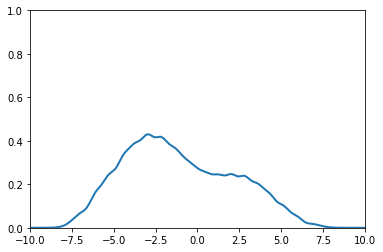

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

xlim = (-10,10)
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=xlim, ylim=(0, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    time = i*0.1
    xx = np.arange(xlim[0],xlim[1],0.01)
    y = psi_anim(xx,time)
    line.set_data(xx, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=40, blit=True)

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [13]:
from IPython.display import HTML

HTML(anim.to_html5_video())